In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
DATA_FILE = '../data/전세계GDP.csv'
dataDF = pd.read_csv(DATA_FILE) 
dataDF = dataDF.drop(dataDF.index[0:2],axis=0)
dataDF = dataDF.drop(dataDF.index[-1:], axis=0)
dataDF.rename(columns={'GDP, current prices (Billions of U.S. dollars)': '국가'}, inplace=True)
dataDF = dataDF.replace('no data', np.nan)
dataDF = dataDF.set_index('국가')
dataDF = dataDF.astype('float')


df = dataDF.copy()
df = df.T
display(df.head())
df.dtypes

국가,알바니아,알제리,안도라,앙골라,앤티가 바부다,아르헨티나,아르메니아,아루바,오스트레일리아,오스트리아,...,신흥시장 및 개발도상국,유로 지역,유럽연합,라틴아메리카 및 카리브해,주요 선진 7개국 (G7),중동 및 중앙아시아,기타 선진국,사하라 이남 아프리카,세계,쿠바
1980,1.946,45.957,NaN,8.730,0.132,233.696,NaN,NaN,162.925,80.481,...,2778.527,NaN,3210.009,876.724,6899.738,552.608,776.001,322.168,11257.209,19.913
1981,2.229,48.156,NaN,8.170,0.149,189.802,NaN,NaN,188.411,69.738,...,2937.985,NaN,2837.577,950.198,7116.547,614.614,791.714,340.015,11552.049,20.150
1982,2.296,48.599,NaN,8.170,0.166,94.250,NaN,NaN,187.050,69.727,...,2787.740,NaN,2750.340,778.004,7084.008,613.292,786.892,342.696,11340.968,20.954
1983,2.319,51.582,NaN,8.514,0.185,116.267,NaN,NaN,179.479,70.644,...,2750.025,NaN,2689.430,707.033,7476.475,629.933,785.593,317.323,11650.964,22.205
1984,2.290,55.906,NaN,9.025,0.212,130.544,NaN,NaN,197.137,66.640,...,2757.409,NaN,2589.084,737.938,7867.149,640.023,823.796,252.021,12065.980,24.039


국가
알바니아           float64
알제리            float64
안도라            float64
앙골라            float64
앤티가 바부다        float64
                ...   
중동 및 중앙아시아     float64
기타 선진국         float64
사하라 이남 아프리카    float64
세계             float64
쿠바             float64
Length: 229, dtype: object

In [3]:
## 사회 체제별 분류

# 민주 자본주의
mjDF = df[['대한민국', '일본', '미국', '영국', '프랑스', '독일', '캐나다',
    '뉴질랜드', '홍콩', '스위스', '스웨덴', '노르웨이',
    '핀란드', '덴마크', '아이슬란드', '이탈리아', '네덜란드',
    '벨기에', '오스트리아', '아일랜드', '포르투갈', '스페인',
    '이스라엘', '싱가포르']]
mjmean = mjDF.mean().sort_values(ascending=False).head(5)
mj = mjDF[mjmean.index].T.mean()

# 민주 사회주의(복지 국가들)
msDF = df[['스웨덴', '덴마크', '노르웨이', '핀란드', '아이슬란드']]
msmean = msDF.mean().sort_values(ascending=False).head(5)
ms = msDF[msmean.index].T.mean()

# 공산 자본주의
kjDF = df[['중국', '베트남', '라오스', '모잠비크', '에티오피아', '캄보디아']]
kjDF['캄보디아'] = kjDF['캄보디아'].interpolate(limit_direction='both')
kjmean = kjDF.mean().sort_values(ascending=False).head(5)
kj = kjDF[kjmean.index].T.mean()

# 공산 사회주의
ksDF = df[['니카라과','벨라루스','베네수엘라', '쿠바']]
ksDF['벨라루스'] = ksDF['벨라루스'].interpolate(limit_direction='both')
ksDF['쿠바'] = ksDF['쿠바'].interpolate(limit_direction='both')
ksmean = ksDF.mean().sort_values(ascending=False).head(5)
ks = ksDF[ksmean.index].T.mean()




C:\Users\lsj03\AppData\Local\Temp\ipykernel_23000\587950238.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kjDF['캄보디아'] = kjDF['캄보디아'].interpolate(limit_direction='both')
C:\Users\lsj03\AppData\Local\Temp\ipykernel_23000\587950238.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ksDF['벨라루스'] = ksDF['벨라루스'].interpolate(limit_direction='both')
C:\Users\lsj03\AppData\Local\Temp\ipykernel_23000\587950238.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

<Axes: >

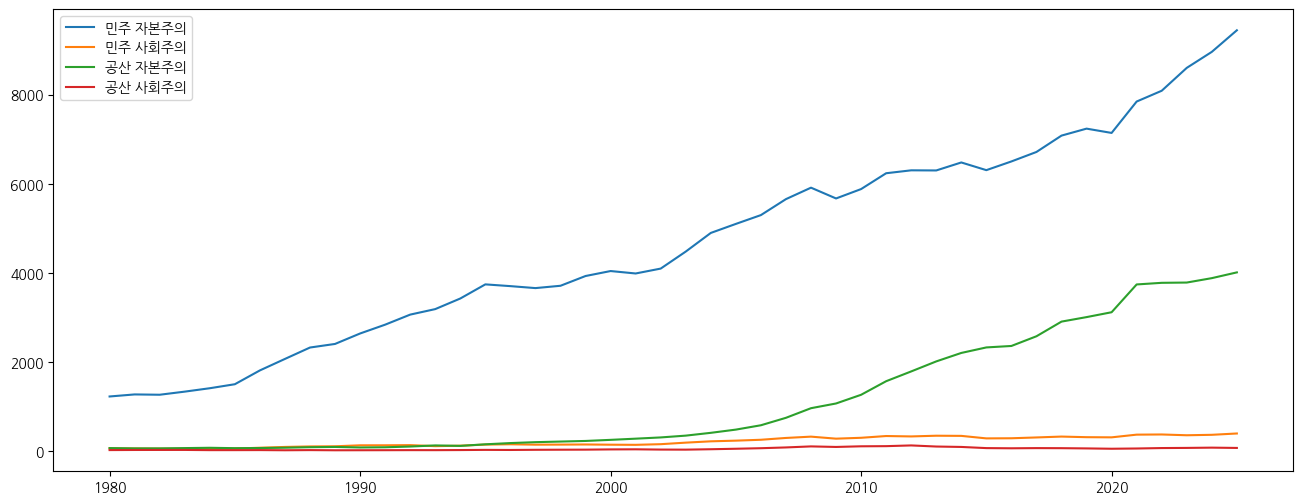

In [4]:

mean = pd.concat([mj,ms,kj,ks],axis=1)
mean.columns = ['민주 자본주의', '민주 사회주의', '공산 자본주의', '공산 사회주의']

mean.plot(figsize=(16,6))

<Axes: >

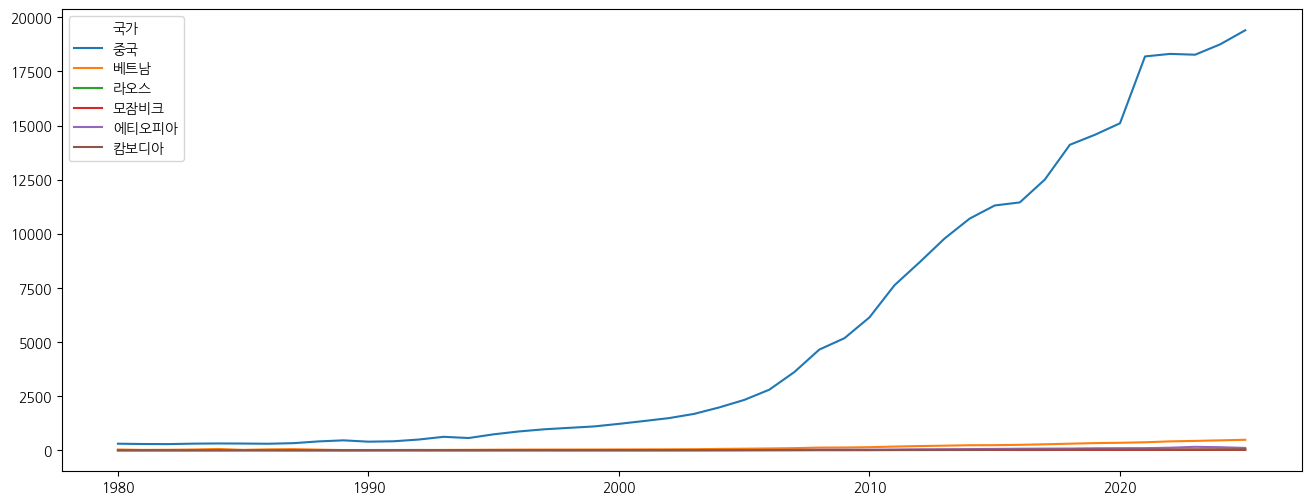

In [5]:
kjDF.plot(figsize=(16,6))

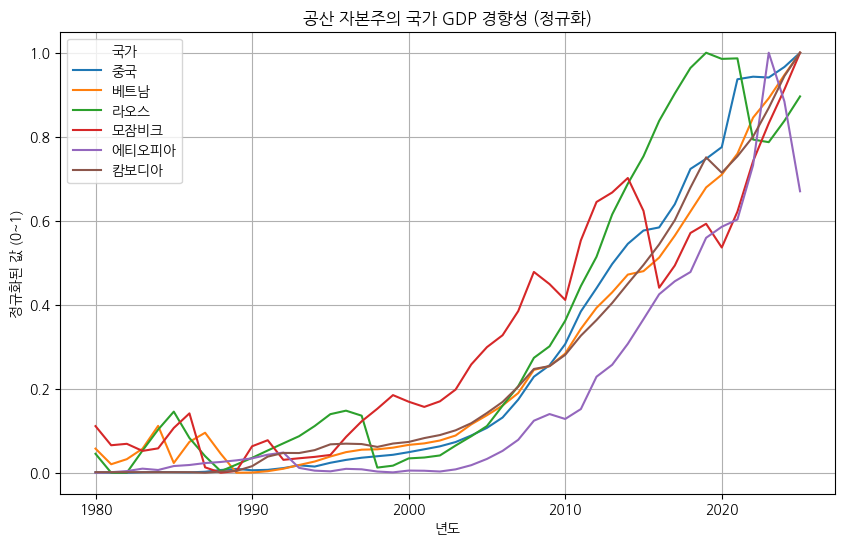

In [6]:
# 정규화
kj_norm = (kjDF - kjDF.min()) / (kjDF.max() - kjDF.min())
kj_norm.plot(figsize=(10,6), title='공산 자본주의 국가 GDP 경향성 (정규화)')
plt.xlabel('년도')
plt.ylabel('정규화된 값 (0~1)')
plt.grid(True)
plt.show()

In [7]:
DATA_FILE = '../data/HDR2.csv'
hdrDF = pd.read_csv(DATA_FILE)
hdrDF.head()
hdrDF = hdrDF.drop(columns=['hdicode','hdi_rank_2023'])
hdrDF = hdrDF.set_index('country')

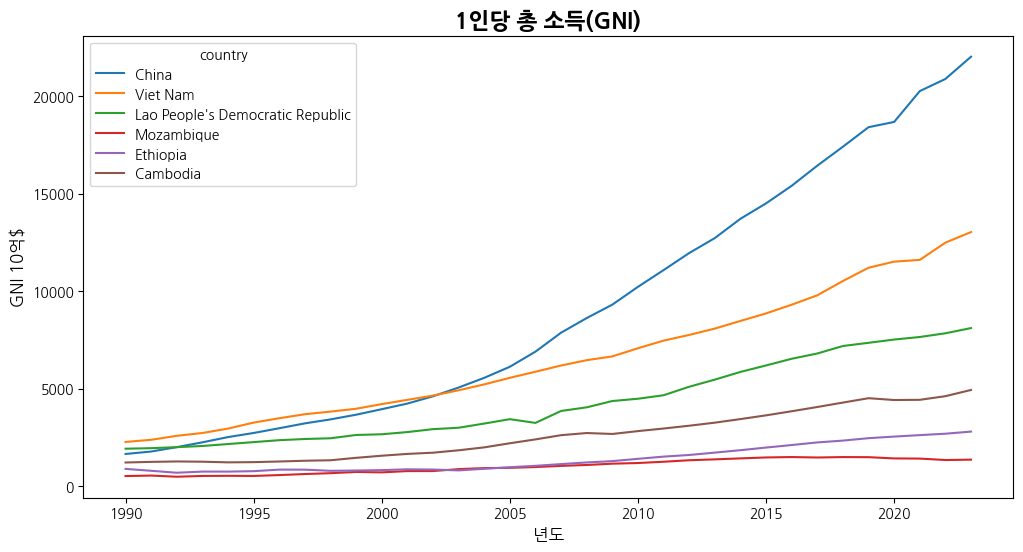

In [8]:
countries = ['China', 'Viet Nam', "Lao People's Democratic Republic",
             'Mozambique', 'Ethiopia', 'Cambodia'    
             ]

gnipc = hdrDF.filter(regex='gnipc', axis=1).loc[countries].T

gnipc.index = gnipc.index.str.replace('gnipc_', '').astype(int)

gnipc.plot(figsize = (12,6))
plt.title('1인당 총 소득(GNI)', fontsize=16, fontweight='bold')
plt.xlabel('년도',size=12)
plt.ylabel('GNI 10억$',size=12)
plt.show()

In [9]:


countries = ['China', 'Viet Nam', "Lao People's Democratic Republic",
             'Mozambique', 'Ethiopia', 'Cambodia', ]
# "Korea (Republic of)","United States", "United Kingdom", "Japan"

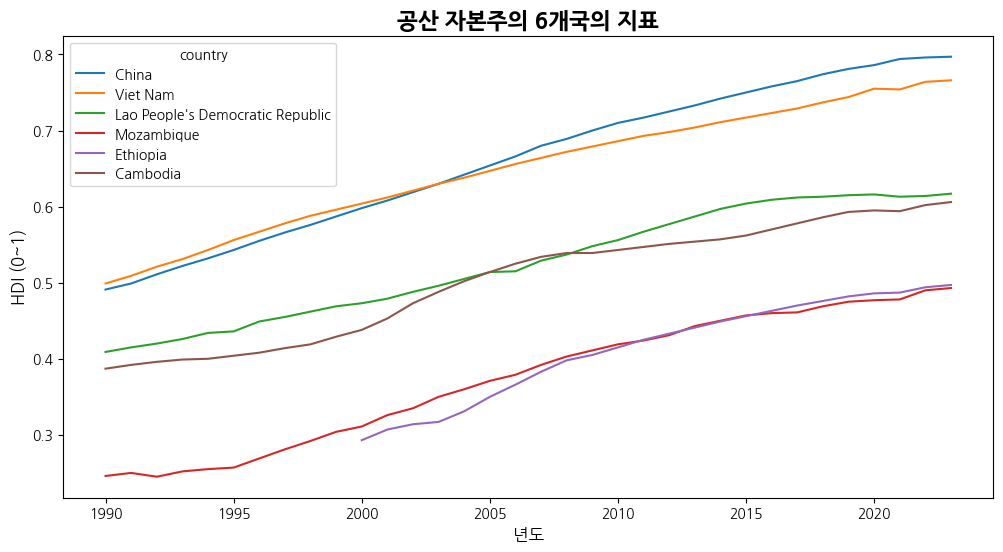

In [10]:



#  각 지표별 필터링
hdi = hdrDF.filter(regex='^hdi_[0-9]+$', axis=1).loc[countries].T



#  인덱스(연도) 정리
hdi.index = hdi.index.str.replace('hdi_', '').astype(int)


hdi.plot(figsize = (12,6))
#  그래프 시각화
plt.title('공산 자본주의 6개국의 지표', fontsize=16, fontweight='bold')

plt.xlabel('년도',size=12)
plt.ylabel('HDI (0~1)',size=12)
plt.show()

<Axes: xlabel='year'>

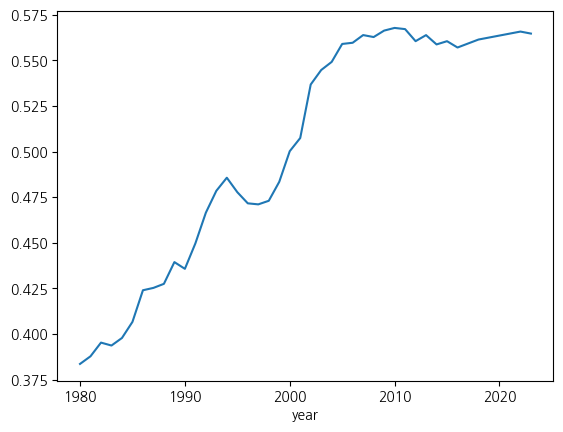

In [11]:
DATA_FILE = '../data/jini_index.csv'
jiniDF = pd.read_csv(DATA_FILE)

jiniFV = jiniDF.pivot(index='year', columns='country', values='jini_index')

jiniFV['China'] = jiniFV['China'].interpolate(limit_direction='both')

jiniFV['China'].plot()
